In [13]:
import time

from ib.opt import message
import numpy as np
import pandas as pd

import contracts
from settings import TWS_CONNECTION, company

In [ ]:
# Look for all strikes and expirations
from ib.ext.ContractDetails import ContractDetails
from ib.ext.EClientSocket import EClientSocket
from ib.opt import message


class OptionChain():
    options = []
    wait = 0.
    stop = False
    
    def __init__(self, company):
        self.contract = contracts.CallOption(
            company,
            None,
            None
        )
    
    def get_options(self):
        TWS_CONNECTION.registerAll(print)
        TWS_CONNECTION.register(self.msg_handler, 'ContractDetails')
        TWS_CONNECTION.register(self.msg_stopper, 'ContractDetailsEnd')
        TWS_CONNECTION.connect()
        EClientSocket.reqContractDetails(TWS_CONNE
                                         CTION, 2, self.contract)
        while not self.stop and self.wait < 30.:
            time.sleep(0.1)
            self.wait += 0.1
        TWS_CONNECTION.disconnect()
        return self.options

    def msg_stopper(self, msg):
        if msg:
            self.stop = True
        
    def msg_handler(self, msg):
        self.options.append({
            'strike': msg.contractDetails.m_summary.m_strike,
            'expiration': msg.contractDetails.m_summary.m_expiry
        })

In [158]:
def get_option_prices(contract_):
    """
    Function gets option Contract() object and returns dict w/ Datetime-Price items for the last week
    :contract: option Contract() object instance,
    :return: dict w/ following items:
        * ['Datetime']: datetime in format '20191127  21:30:00',
        * ['Price']: day-close or the latest in the day price in float format
                     or None if there was not any trade in that day
    """
    contract = contract_
    prices = {}
    
    class TWSRequester(object):     
        wait = 30
        stop = False

        def get_prices(self):
            TWS_CONNECTION.register(self.msg_handler, message.historicalData)
            TWS_CONNECTION.register(self.error_handler, message.Error)
    #         TWS_CONNECTION.registerAll(print)
            TWS_CONNECTION.connect()
            TWS_CONNECTION.reqHistoricalData(
                1,
                contract,
                '',
                '1 W',
                '30 mins',
                'TRADES',
                1,
                1
            )
            while not self.stop and self.wait:
                step = 1
                time.sleep(step)
                self.wait -= step
                print(self.wait, self.stop)
            TWS_CONNECTION.disconnect()

        def msg_handler(self, msg):
            """
            Function get message from TWS and put it into pandas DataFrame object
            :param msg: message from TWS
            :return: dataframe w/ historical prices
            """
            if 'finished-' in msg.date:
                self.stop = True
                return None
            prices[msg.date] = msg.close

        def error_handler(self, msg):
    #         print(type(msg), msg)
            if msg.errorCode == 200:
                self.stop = True              
    
    TWSRequester().get_prices()            
    return prices

In [159]:
# TWS_CONNECTION.disconnect()
expiration = '20191206'
strike = 300.
contract = contracts.PutOption(
    company,
    expiration,
    strike
)
prices = get_option_prices(contract)

03-Dec-19 01:03:47 ERROR     Exception in message dispatch.  Handler 'error_handler' for 'error'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: error_handler() takes 1 positional argument but 2 were given


<managedAccounts accountsList=U2296624>
<nextValidId orderId=1>
<error id=-1, errorCode=2158, errorMsg=Sec-def data farm connection is OK:secdefeu>
29 False
28 False
27 False


03-Dec-19 01:03:50 ERROR     Exception in message dispatch.  Handler 'error_handler' for 'error'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: error_handler() takes 1 positional argument but 2 were given


<error id=-1, errorCode=2106, errorMsg=HMDS data farm connection is OK:ushmds>


03-Dec-19 01:03:51 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:51 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:51 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py"

<historicalData reqId=1, date=20191126  17:30:00, open=0.46, high=0.5, low=0.43, close=0.43, volume=56, count=23, WAP=0.485, hasGaps=False>
<historicalData reqId=1, date=20191126  18:00:00, open=0.39, high=0.46, low=0.39, close=0.46, volume=28, count=20, WAP=0.421, hasGaps=False>
<historicalData reqId=1, date=20191126  18:30:00, open=0.48, high=0.49, low=0.42, close=0.42, volume=3, count=3, WAP=0.463, hasGaps=False>
26 False
<historicalData reqId=1, date=20191126  19:00:00, open=0.41, high=0.41, low=0.35, close=0.38, volume=23, count=9, WAP=0.386, hasGaps=False>
<historicalData reqId=1, date=20191126  19:30:00, open=0.32, high=0.32, low=0.32, close=0.32, volume=30, count=1, WAP=0.32, hasGaps=False>


03-Dec-19 01:03:51 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:51 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:51 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py"

<historicalData reqId=1, date=20191126  20:00:00, open=0.35, high=0.36, low=0.35, close=0.36, volume=16, count=8, WAP=0.354, hasGaps=False>
<historicalData reqId=1, date=20191126  20:30:00, open=0.37, high=0.37, low=0.37, close=0.37, volume=8, count=3, WAP=0.37, hasGaps=False>
<historicalData reqId=1, date=20191126  21:00:00, open=0.39, high=0.39, low=0.37, close=0.37, volume=13, count=4, WAP=0.373, hasGaps=False>
<historicalData reqId=1, date=20191126  21:30:00, open=0.39, high=0.6, low=0.39, close=0.52, volume=78, count=24, WAP=0.485, hasGaps=False>
<historicalData reqId=1, date=20191126  22:00:00, open=0.55, high=0.6, low=0.54, close=0.58, volume=115, count=37, WAP=0.556, hasGaps=False>


03-Dec-19 01:03:51 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:51 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:51 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py"

<historicalData reqId=1, date=20191126  22:30:00, open=0.58, high=0.61, low=0.57, close=0.61, volume=86, count=16, WAP=0.596, hasGaps=False>
<historicalData reqId=1, date=20191126  23:00:00, open=0.59, high=0.6, low=0.53, close=0.54, volume=90, count=26, WAP=0.574, hasGaps=False>
<historicalData reqId=1, date=20191126  23:30:00, open=0.57, high=0.57, low=0.47, close=0.48, volume=26, count=10, WAP=0.508, hasGaps=False>
<historicalData reqId=1, date=20191127  17:30:00, open=0.34, high=0.38, low=0.27, close=0.27, volume=150, count=18, WAP=0.31, hasGaps=False>
<historicalData reqId=1, date=20191127  18:00:00, open=0.27, high=0.31, low=0.27, close=0.29, volume=11, count=8, WAP=0.286, hasGaps=False>


03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py"

<historicalData reqId=1, date=20191127  18:30:00, open=0.32, high=0.37, low=0.32, close=0.36, volume=49, count=15, WAP=0.328, hasGaps=False>
<historicalData reqId=1, date=20191127  19:00:00, open=0.37, high=0.37, low=0.35, close=0.35, volume=103, count=4, WAP=0.37, hasGaps=False>
<historicalData reqId=1, date=20191127  19:30:00, open=0.35, high=0.37, low=0.35, close=0.36, volume=15, count=6, WAP=0.365, hasGaps=False>
<historicalData reqId=1, date=20191127  20:00:00, open=0.37, high=0.37, low=0.37, close=0.37, volume=11, count=2, WAP=0.37, hasGaps=False>
<historicalData reqId=1, date=20191127  20:30:00, open=0.4, high=0.4, low=0.38, close=0.4, volume=28, count=7, WAP=0.397, hasGaps=False>


03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py"

<historicalData reqId=1, date=20191127  21:00:00, open=0.39, high=0.41, low=0.39, close=0.41, volume=6, count=2, WAP=0.393, hasGaps=False>
<historicalData reqId=1, date=20191127  21:30:00, open=0.34, high=0.37, low=0.34, close=0.37, volume=104, count=6, WAP=0.36, hasGaps=False>
<historicalData reqId=1, date=20191127  22:00:00, open=0.38, high=0.38, low=0.38, close=0.38, volume=2, count=1, WAP=0.38, hasGaps=False>
<historicalData reqId=1, date=20191127  22:30:00, open=0.38, high=0.38, low=0.38, close=0.38, volume=0, count=0, WAP=0.38, hasGaps=False>
<historicalData reqId=1, date=20191127  23:00:00, open=0.38, high=0.38, low=0.38, close=0.38, volume=0, count=0, WAP=0.38, hasGaps=False>


03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py"

<historicalData reqId=1, date=20191127  23:30:00, open=0.3, high=0.3, low=0.28, close=0.29, volume=23, count=4, WAP=0.294, hasGaps=False>
<historicalData reqId=1, date=20191129  17:30:00, open=0.35, high=0.39, low=0.31, close=0.36, volume=473, count=101, WAP=0.366, hasGaps=False>
25 False
<historicalData reqId=1, date=20191129  18:00:00, open=0.37, high=0.38, low=0.33, close=0.33, volume=53, count=27, WAP=0.364, hasGaps=False>
<historicalData reqId=1, date=20191129  18:30:00, open=0.29, high=0.3, low=0.28, close=0.28, volume=60, count=9, WAP=0.298, hasGaps=False>
<historicalData reqId=1, date=20191129  19:00:00, open=0.3, high=0.3, low=0.26, close=0.26, volume=14, count=9, WAP=0.283, hasGaps=False>
<historicalData reqId=1, date=20191129  19:30:00, open=0.27, high=0.28, low=0.27, close=0.27, volume=5, count=4, WAP=0.272, hasGaps=False>


03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py"

<historicalData reqId=1, date=20191129  20:00:00, open=0.27, high=0.28, low=0.26, close=0.28, volume=83, count=14, WAP=0.274, hasGaps=False>
<historicalData reqId=1, date=20191129  20:30:00, open=0.27, high=0.3, low=0.27, close=0.3, volume=121, count=18, WAP=0.284, hasGaps=False>
<historicalData reqId=1, date=20191202  17:30:00, open=0.3, high=0.3, low=0.19, close=0.2, volume=341, count=67, WAP=0.211, hasGaps=False>
<historicalData reqId=1, date=20191202  18:00:00, open=0.19, high=0.21, low=0.19, close=0.21, volume=139, count=24, WAP=0.196, hasGaps=False>
<historicalData reqId=1, date=20191202  18:30:00, open=0.22, high=0.27, low=0.22, close=0.23, volume=56, count=11, WAP=0.248, hasGaps=False>
<historicalData reqId=1, date=20191202  19:00:00, open=0.22, high=0.23, low=0.22, close=0.22, volume=7, count=4, WAP=0.223, hasGaps=False>


03-Dec-19 01:03:52 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:53 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:53 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py"

<historicalData reqId=1, date=20191202  19:30:00, open=0.22, high=0.22, low=0.22, close=0.22, volume=0, count=0, WAP=0.22, hasGaps=False>
<historicalData reqId=1, date=20191202  20:00:00, open=0.15, high=0.15, low=0.14, close=0.14, volume=39, count=7, WAP=0.146, hasGaps=False>
<historicalData reqId=1, date=20191202  20:30:00, open=0.14, high=0.15, low=0.14, close=0.14, volume=107, count=6, WAP=0.14, hasGaps=False>
<historicalData reqId=1, date=20191202  21:00:00, open=0.16, high=0.16, low=0.15, close=0.15, volume=101, count=2, WAP=0.16, hasGaps=False>
<historicalData reqId=1, date=20191202  21:30:00, open=0.13, high=0.15, low=0.13, close=0.14, volume=8, count=5, WAP=0.143, hasGaps=False>
<historicalData reqId=1, date=20191202  22:00:00, open=0.13, high=0.14, low=0.13, close=0.13, volume=42, count=4, WAP=0.137, hasGaps=False>


03-Dec-19 01:03:53 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:53 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py", line 44, in __call__
    results.append(listener(message))
TypeError: msg_handler() takes 1 positional argument but 2 were given
03-Dec-19 01:03:53 ERROR     Exception in message dispatch.  Handler 'msg_handler' for 'historicalData'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ib/opt/dispatcher.py"

<historicalData reqId=1, date=20191202  22:30:00, open=0.12, high=0.12, low=0.12, close=0.12, volume=1, count=1, WAP=0.12, hasGaps=False>
<historicalData reqId=1, date=20191202  23:00:00, open=0.11, high=0.11, low=0.1, close=0.1, volume=31, count=3, WAP=0.1, hasGaps=False>
<historicalData reqId=1, date=20191202  23:30:00, open=0.13, high=0.14, low=0.13, close=0.13, volume=9, count=5, WAP=0.137, hasGaps=False>
<historicalData reqId=1, date=finished-20191126  01:03:46-20191203  01:03:46, open=-1, high=-1, low=-1, close=-1, volume=-1, count=-1, WAP=-1, hasGaps=False>
24 True


In [166]:
pd.DataFrame(prices.values(), index=prices.keys(), columns=[['P'],[expiration],[strike]])

,P
,20191206
,300.0
20191126 17:30:00,0.43
20191126 18:00:00,0.46
20191126 18:30:00,0.42
20191126 19:00:00,0.38
20191126 19:30:00,0.32
20191126 20:00:00,0.36
20191126 20:30:00,0.37
20191126 21:00:00,0.37


In [31]:
class GetPutCallPrices():
    contract = None
    right = None
    prices_put = pd.DataFrame()
    prices_call = pd.DataFrame()
    prices_msg = pd.DataFrame()
    wait = 0.
    stop = False
    
    def __init__(self, company, expiration, strike):
        self.company = company
        self.expiration = expiration
        self.strike = strike

    def get_prices(self):
        """
        Metho
        """
        TWS_CONNECTION.register(self.msg_handler, message.historicalData)
        TWS_CONNECTION.register(self.error_handler, message.Error)
#         TWS_CONNECTION.registerAll(print)
        self.get_put_prices()
        prices_put = self.prices_msg
        print(prices_put)
        self.prices_msg = pd.DataFrame()
        self.get_call_prices()
        prices_call = self.prices_msg
        # Merge PUT & CALL into one DateFrame
        result = prices_call.join(prices_put, how='outer', lsuffix='_left', rsuffix='_right')
        print(prices_call)
        print(result)
        return result
       
    def get_put_prices(self):
        self.right = 'P' # for the column name
        self.contract = contracts.PutOption(
            self.company,
            self.expiration,
            self.strike
        )
        self.request_prices()

    def get_call_prices(self):
        self.right = 'C' # for the column name
        self.contract = contracts.CallOption(
            self.company,
            self.expiration,
            self.strike
        )
        self.request_prices()
 
    def request_prices(self):
        TWS_CONNECTION.connect()
        TWS_CONNECTION.reqHistoricalData(
            1,
            self.contract,
            '',
            '1 W',
            '30 mins',
            "MIDPOINT",
            1,
            1
        )
        while not self.stop and self.wait < 30.:
            time.sleep(0.1)
            self.wait += 0.1
        TWS_CONNECTION.disconnect()
        self.wait = 0.
        self.stop = False
        
    def msg_handler(self, msg):
        """
        Function get message from TWS and put it into pandas DataFrame object
        :param msg: message from TWS
        :return: dataframe w/ historical prices
        """
        if 'finished' in msg.date:
            self.stop = True
            return None
        columns = pd.MultiIndex.from_product([[self.right], [self.expiration], [self.strike]])
        new_row = pd.DataFrame(msg.close, index=[msg.date], columns=columns)
        self.prices_msg = self.prices_msg.append(new_row)
    
    def error_handler(self, msg):
#         print(type(msg), msg)
        if msg.errorCode == 200:
            self.stop = True

In [76]:
index = ['Right', 'Expiration', 'Strike']
a = {
    'Datetime': '20191127  21:30:00',
    'Right': 'P',
    'Expiration': '20191206',
    'Strike': 300.,
    'Price': 0.37
}
b = {
    'Right': 'C',
    'Expiration': '20191206',
    'Strike': 300.,
    '20191127  21:30:00': 1.37
}
test = pd.DataFrame()

columns = pd.MultiIndex.from_product([[a['Right']], [a['Expiration']], [a['Strike']]])
a = pd.DataFrame(a['Price'], index=[a['Datetime']], columns=columns)
# a = pd.DataFrame(a, index=['Datetime'], columns='Price')# = [0]).set_index(['Right', 'Expiration', 'Strike'])
# print(a)
b = pd.DataFrame(b, index = [0]).set_index(['Right', 'Expiration', 'Strike'])
# b
# test = test.append(a)
# test = test.append(b)
# # print(test)
# c = {
#     'Right': 'C',
#     'Expiration': '20191206',
#     'Strike': 300.,
#     '20191128  21:30:00': 5.23    # at the next day
# }
# c = pd.DataFrame(c, index = [0]).set_index(['Right', 'Expiration', 'Strike'])
# test = pd.concat([test, c], axis=1, sort=False)
# d = pd.DataFrame()
# test = pd.concat([test, d], axis=1, sort=False)

right = 'P'
expiration = '20191206'
strike = 300.
e = {
    'Datetime': '20191127  21:30:00',
    'Price': 0.37
}
f = {
    'Datetime': '20191128  21:30:00',
    'Price': None
}
d = {
    'Datetime': '20191128  21:30:00',
    'Price': None
}
columns = pd.MultiIndex.from_product([[right], [expiration], [strike]])
e = pd.DataFrame(e['Price'], index=[e['Datetime']], columns=columns)
f = pd.DataFrame(f['Price'], index=[f['Datetime']], columns=columns)
strike = 302.5
columns = pd.MultiIndex.from_product([[right], [expiration], [strike]])
d = pd.DataFrame(d['Price'], index=[d['Datetime']], columns=columns)
# test = pd.concat([test, e], axis=1, sort=False)
pd.concat([e, f, d])

P      
                   20191206      
                      300.0 302.5
20191127  21:30:00     0.37   NaN
20191128  21:30:00      NaN   NaN
20191128  21:30:00      NaN   NaN

In [46]:
a = {
    'Datetime': '20191127  21:30:00',
    'Right': 'P',
    'Expiration': '20191206',
    'Strike': 300.,
    'Price': 0.37
}
b = {
    'Datetime': '20191127  21:30:00',
    'Right': 'C',    # new
    'Expiration': '20191206',
    'Strike': 300.,
    'Price': 5.3
}
test = pd.DataFrame()

columns = pd.MultiIndex.from_product([[a['Right']], [a['Expiration']], [a['Strike']]])
a = pd.DataFrame(a['Price'], index=[a['Datetime']], columns=columns)
# print(a)
test = test.append(a)
columns = pd.MultiIndex.from_product([[b['Right']], [b['Expiration']], [b['Strike']]])
b = pd.DataFrame(b['Price'], index=[b['Datetime']], columns=columns)
# print(b)
test = test.append(b)
# print(test)

c = {
    'Datetime': '20191128  21:30:00', # new
    'Right': 'C',
    'Expiration': '20191206',
    'Strike': 300.,
    'Price': 16.3
}
columns = pd.MultiIndex.from_product([[c['Right']], [c['Expiration']], [c['Strike']]])
c = pd.DataFrame(c['Price'], index=[c['Datetime']], columns=columns)

# test = test.append(c)
# print(test.merge(c, how='outer', left_index=True, right_index=True))

# d = {
#     'Datetime': '20191129  21:30:00',
#     'Right': 'C',
#     'Expiration': '20191206',
#     'Strike': 305.,    # new
#     'Price': 9.5
# }
# columns = pd.MultiIndex.from_product([[d['Right']], [d['Expiration']], [d['Strike']]])
# d = pd.DataFrame(d['Price'], index=[d['Datetime']], columns=columns)
# # test = pd.concat([test, d], axis=0, sort=False)



# test = test.join(d, how='outer')
# test





                        C_x        P      C_y
                   20191206 20191206 20191206
                      300.0    300.0    300.0
20191127  21:30:00      NaN     0.37      NaN
20191127  21:30:00      5.3      NaN      NaN
20191128  21:30:00      NaN      NaN     16.3


In [7]:
prices = GetPutCallPrices(
    company,
    '20191227',   # 20220121
    300.0   # 420
).get_prices()
print(prices)
prices.index = pd.to_datetime(prices.index)
prices = prices.groupby(pd.Grouper(freq='D')).nth(-1) # convert to 1D timeframe

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [132]:
prices

,C,P
,20191227,20191227
,300.0,300.0
2019-11-25,41.08,3.15
2019-11-26,32.60,3.50
2019-11-27,33.19,2.95
2019-11-29,33.00,3.38


In [8]:
# %matplotlib inline
import matplotlib.pyplot as plt

import logging
mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.ERROR)

01-Dec-19 22:27:03 DEBUG     CACHEDIR=/Users/Galich/.matplotlib
01-Dec-19 22:27:03 DEBUG     Using fontManager instance from /Users/Galich/.matplotlib/fontlist-v310.json
01-Dec-19 22:27:04 DEBUG     Loaded backend module://ipykernel.pylab.backend_inline version unknown.
01-Dec-19 22:27:04 DEBUG     Loaded backend module://ipykernel.pylab.backend_inline version unknown.


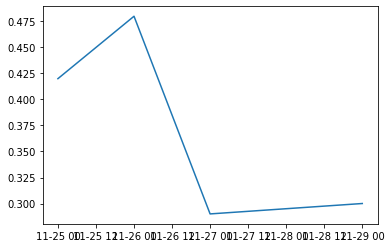

In [38]:
plt.plot(prices['P'])
plt.show()

In [ ]:
# Look for all strikes and expirations
from ib.ext.ContractDetails import ContractDetails
from ib.ext.EClientSocket import EClientSocket
from ib.opt import message


class OptionChain():
    options = []
    wait = 0.
    stop = False
    
    def __init__(self, company):
        self.contract = contracts.CallOption(
            company,
            None,
            None
        )
    
    def get_options(self):
        TWS_CONNECTION.registerAll(print)
        TWS_CONNECTION.register(self.msg_handler, 'ContractDetails')
        TWS_CONNECTION.register(self.msg_stopper, 'ContractDetailsEnd')
        TWS_CONNECTION.connect()
        EClientSocket.reqContractDetails(TWS_CONNE
                                         CTION, 2, self.contract)
        while not self.stop and self.wait < 30.:
            time.sleep(0.1)
            self.wait += 0.1
        TWS_CONNECTION.disconnect()
        return self.options

    def msg_stopper(self, msg):
        if msg:
            self.stop = True
        
    def msg_handler(self, msg):
        self.options.append({
            'strike': msg.contractDetails.m_summary.m_strike,
            'expiration': msg.contractDetails.m_summary.m_expiry
        })

In [23]:
options = OptionChain(company).get_options()
options

<managedAccounts accountsList=U2296624>
<nextValidId orderId=1>
<error id=-1, errorCode=2158, errorMsg=Sec-def data farm connection is OK:secdefeu>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1135eec50>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1135eec50>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1135eec50>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1135eec50>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1135eec50>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1135eec50>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1135eec50>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1135eec50>>
<con

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11363f5c0>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136570f0>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136f69b0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1136f69b0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137340b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137340b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137340b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137340b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137340b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137340b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137340b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137340b8>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11371d128>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11371d128>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11371d128>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11371d128>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11371d128>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11371d128>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11371d128>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11371d128>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11371d128>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11375b0b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11375b0b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11375b0b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11375b0b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11375b0b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11375b0b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11375b0b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11375b0b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11375b0b8>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137746a0>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x11378ef28>>
<contractDetails reqId=2, contractDetails=<ib.

<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.ext.ContractDetails.ContractDetails object at 0x1137100b8>>
<contractDetails reqId=2, contractDetails=<ib.

[{'strike': 175.0, 'expiration': '20200117'},
 {'strike': 175.0, 'expiration': '20200117'},
 {'strike': 180.0, 'expiration': '20200117'},
 {'strike': 180.0, 'expiration': '20200117'},
 {'strike': 185.0, 'expiration': '20200117'},
 {'strike': 185.0, 'expiration': '20200117'},
 {'strike': 190.0, 'expiration': '20200117'},
 {'strike': 190.0, 'expiration': '20200117'},
 {'strike': 195.0, 'expiration': '20200117'},
 {'strike': 195.0, 'expiration': '20200117'},
 {'strike': 200.0, 'expiration': '20200117'},
 {'strike': 200.0, 'expiration': '20200117'},
 {'strike': 210.0, 'expiration': '20200117'},
 {'strike': 210.0, 'expiration': '20200117'},
 {'strike': 220.0, 'expiration': '20200117'},
 {'strike': 220.0, 'expiration': '20200117'},
 {'strike': 230.0, 'expiration': '20200117'},
 {'strike': 230.0, 'expiration': '20200117'},
 {'strike': 240.0, 'expiration': '20200117'},
 {'strike': 240.0, 'expiration': '20200117'},
 {'strike': 250.0, 'expiration': '20200117'},
 {'strike': 250.0, 'expiration': '

In [25]:
options

[{'strike': 175.0, 'expiration': '20200117'},
 {'strike': 175.0, 'expiration': '20200117'},
 {'strike': 180.0, 'expiration': '20200117'},
 {'strike': 180.0, 'expiration': '20200117'},
 {'strike': 185.0, 'expiration': '20200117'},
 {'strike': 185.0, 'expiration': '20200117'},
 {'strike': 190.0, 'expiration': '20200117'},
 {'strike': 190.0, 'expiration': '20200117'},
 {'strike': 195.0, 'expiration': '20200117'},
 {'strike': 195.0, 'expiration': '20200117'},
 {'strike': 200.0, 'expiration': '20200117'},
 {'strike': 200.0, 'expiration': '20200117'},
 {'strike': 210.0, 'expiration': '20200117'},
 {'strike': 210.0, 'expiration': '20200117'},
 {'strike': 220.0, 'expiration': '20200117'},
 {'strike': 220.0, 'expiration': '20200117'},
 {'strike': 230.0, 'expiration': '20200117'},
 {'strike': 230.0, 'expiration': '20200117'},
 {'strike': 240.0, 'expiration': '20200117'},
 {'strike': 240.0, 'expiration': '20200117'},
 {'strike': 250.0, 'expiration': '20200117'},
 {'strike': 250.0, 'expiration': '

In [106]:
a = pd.DataFrame()
prices2 = prices.copy()
b = pd.concat([prices, a])
print(b)

                  C        P
           20191206 20191206
                300      300
2019-11-25    38.95     0.42
2019-11-26    28.65     0.48
2019-11-27    30.15     0.29
2019-11-29    30.20     0.30


In [35]:
# options = OptionChain(company).get_options()
result = pd.DataFrame()
i = 0
for option in options[1700:1801]:
    print(i)
    print(option)
    new_prices = GetPutCallPrices(
        company,
        option['expiration'],
        option['strike']
    ).get_prices()
    if i == 0:
        result = new_prices
        result.index = pd.to_datetime(result.index)
#         
    else:
        result = result.join(new_prices, how='outer')
        result.index = pd.to_datetime(result.index)
#         result = result.groupby(pd.Grouper(freq='D')).nth(-1) # convert to 1D timeframe
    i += 1
result

0
{'strike': 375.0, 'expiration': '20200117'}
<managedAccounts accountsList=U2296624>
<nextValidId orderId=1>
<error id=-1, errorCode=2106, errorMsg=HMDS data farm connection is OK:ushmds>
<error id=-1, errorCode=2158, errorMsg=Sec-def data farm connection is OK:secdefeu>
<historicalData reqId=1, date=20191125  17:30:00, open=40.2, high=44.8, low=40.2, close=41.95, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  18:00:00, open=41.95, high=43.925, low=41.425, close=43.125, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  18:30:00, open=43.125, high=46.025, low=42.475, close=45.35, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  19:00:00, open=45.35, high=46.25, low=44.2, close=45.025, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  19:30:00, open=45.025, high=46.525, low=44.3, close=45.075, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<h

<historicalData reqId=1, date=20191125  17:30:00, open=9.9, high=10.475, low=7.9, close=9.3, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  18:00:00, open=9.3, high=9.425, low=8.85, close=8.9, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  18:30:00, open=8.9, high=9.175, low=7.725, close=7.725, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  19:00:00, open=7.725, high=8.05, low=7.45, close=7.775, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  19:30:00, open=7.775, high=7.925, low=7.375, close=7.8, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  20:00:00, open=7.8, high=7.975, low=7.675, close=7.95, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  20:30:00, open=7.95, high=8.025, low=7.5, close=7.55, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData

<historicalData reqId=1, date=20191125  17:30:00, open=40.2, high=44.8, low=40.2, close=41.95, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  18:00:00, open=41.95, high=43.925, low=41.425, close=43.125, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  18:30:00, open=43.125, high=46.025, low=42.475, close=45.35, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  19:00:00, open=45.35, high=46.25, low=44.2, close=45.025, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  19:30:00, open=45.025, high=46.525, low=44.3, close=45.075, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  20:00:00, open=45.075, high=46.1, low=44.225, close=44.325, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  20:30:00, open=44.325, high=46.125, low=43.65, close=45.6, volume=-1, count=-1, WAP=-1.0,

<nextValidId orderId=1>
<error id=-1, errorCode=2106, errorMsg=HMDS data farm connection is OK:ushmds>
<error id=-1, errorCode=2158, errorMsg=Sec-def data farm connection is OK:secdefeu>
<historicalData reqId=1, date=20191125  17:30:00, open=9.9, high=10.475, low=7.9, close=9.3, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  18:00:00, open=9.3, high=9.425, low=8.85, close=8.9, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  18:30:00, open=8.9, high=9.175, low=7.725, close=7.725, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  19:00:00, open=7.725, high=8.05, low=7.45, close=7.775, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  19:30:00, open=7.775, high=7.925, low=7.375, close=7.8, volume=-1, count=-1, WAP=-1.0, hasGaps=False>
<historicalData reqId=1, date=20191125  20:00:00, open=7.8, high=7.975, low=7.675, close=7.95, volume=-1, cou

ValueError: columns overlap but no suffix specified: MultiIndex(levels=[['C', 'P'], ['20200117'], [375.0]],
           codes=[[0, 1], [0, 0], [0, 0]])

In [36]:
result

,C,P
,20200117,20200117
,375.0,375.0
2019-11-25 17:30:00,9.300,41.950
2019-11-25 18:00:00,8.900,43.125
2019-11-25 18:30:00,7.725,45.350
2019-11-25 19:00:00,7.775,45.025
2019-11-25 19:30:00,7.800,45.075
2019-11-25 20:00:00,7.950,44.325
2019-11-25 20:30:00,7.550,45.600
2019-11-25 21:00:00,7.700,45.075


In [325]:
res2 = result.groupby(pd.Grouper(freq='D')).nth(-1) # convert to 1D timeframe
res2

,C,P,C,P
,20200117,20200117,20200117,20200117
,175.0,175.0,180.0,180.0
2019-11-25,NaN,0.310,156.525,0.360
2019-11-26,NaN,0.335,149.100,0.295
2019-11-27,NaN,0.295,151.000,0.340
2019-11-29,0.295,NaN,150.275,0.320


In [324]:
res2.loc[:,res2.columns.get_level_values(2) > 300.]

2019-11-25
2019-11-26
2019-11-27
2019-11-29


In [328]:
df_to_show = res2.loc[:,res2.columns.get_level_values(2) > 300.]
df_to_show.columns.levels[2]

Float64Index([175.0, 180.0], dtype='float64')

In [29]:
plt.rcParams['figure.figsize'] = [20, 10]

# df_to_show = res2['P']['20191213']
# df_to_show = df_to_show[df_to_show > 250.0]

# Draw CALL options
exp = '20200117' # 20191206, 20191213, 20191227
call_options = res2['C'][exp].loc[:,res2['C'][exp].columns.get_level_values(0) > 250.]
call_options = call_options.loc[:,call_options.columns < 351.]
plt.plot(call_options)
plt.legend(call_options.columns)
plt.show()

# Draw PUT options
exp = '20200117' # 20191206, 20191213, 20191227
put_options = res2['P'][exp].loc[:,res2['P'][exp].columns.get_level_values(0) > 320.]
put_options = put_options.loc[:,put_options.columns < 361.]
plt.plot(put_options)
plt.legend(put_options.columns)
plt.title = 'PUT'
plt.show()
print(res2)
print(np.flip(put_options.columns.values))

NameError: name 'res2' is not defined

In [320]:
! git commit -a -m 'In work'
! git push

[version_2 728ffe8] In work
 2 files changed, 2262 insertions(+), 2074 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 5.79 KiB | 592.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/SVGalich/tws_trader.git
   117ae56..728ffe8  version_2 -> version_2


## Гипотезы
1. Пересечение прямых Пут-Страйк различных дат экспирации: сигнал для сделки! Происходят при резких колебаниях underlying актива.